In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [11]:
# Load your dataset (replace 'your_dataset.csv' with your dataset path)
df = pd.read_csv('property.csv')

In [12]:
df.shape

(4930, 11)

In [13]:
df.columns

Index(['item_id', 'deposit', 'monthly_rent', 'district_uuid', 'room_qty',
       'unit_area', 'has_elevator', 'building_floor_count', 'unit_floor',
       'has_storage_area', 'property_age'],
      dtype='object')

In [14]:
# Selecting numerical columns for outlier detection
numerical_cols = df.select_dtypes(include=[np.number]).columns

numerical_cols

Index(['deposit', 'monthly_rent', 'room_qty', 'unit_area',
       'building_floor_count', 'unit_floor', 'property_age'],
      dtype='object')

In [15]:
# Drop rows with NaN values in numerical columns
df = df.dropna(subset=numerical_cols)

In [16]:
# Standardize the data
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [17]:
# Isolation Forest
iso_forest = IsolationForest(contamination=0.1)  # You can adjust contamination parameter
iso_forest.fit(df[numerical_cols])
df['iso_forest_outlier'] = iso_forest.predict(df[numerical_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [18]:
# Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)  # You can adjust n_neighbors and contamination parameters
df['lof_outlier'] = lof.fit_predict(df[numerical_cols])

In [19]:
# Visualizing outliers
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

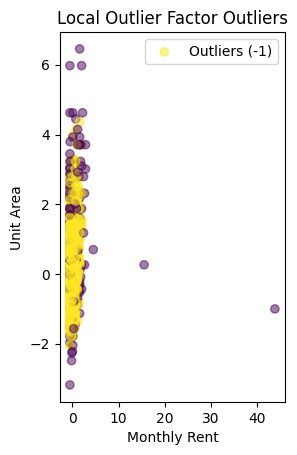

In [22]:
plt.subplot(1, 2, 2)
plt.scatter(df['monthly_rent'], df['unit_area'], c=df['lof_outlier'], cmap='viridis', label='Outliers (-1)', alpha=0.5)
plt.title('Local Outlier Factor Outliers')
plt.xlabel('Monthly Rent')
plt.ylabel('Unit Area')
plt.legend()

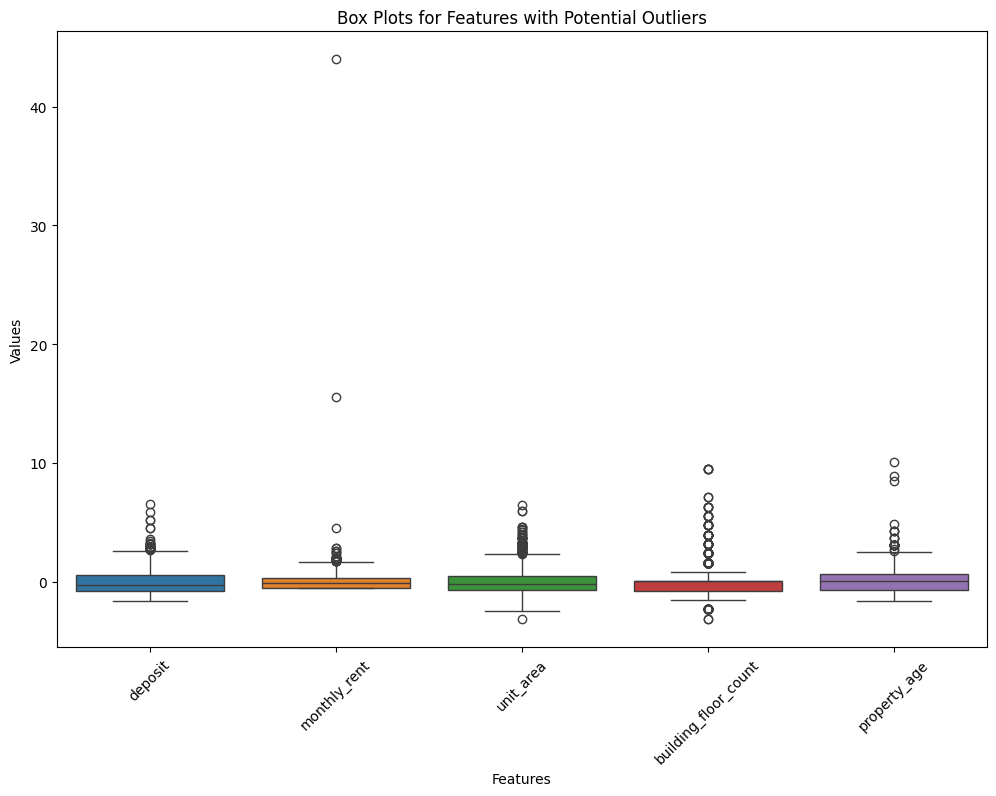

In [26]:
import seaborn as sns
# Create box plots for features with higher possibility of outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['deposit', 'monthly_rent', 'unit_area', 'building_floor_count', 'property_age']])
plt.title('Box Plots for Features with Potential Outliers')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x800 with 0 Axes>

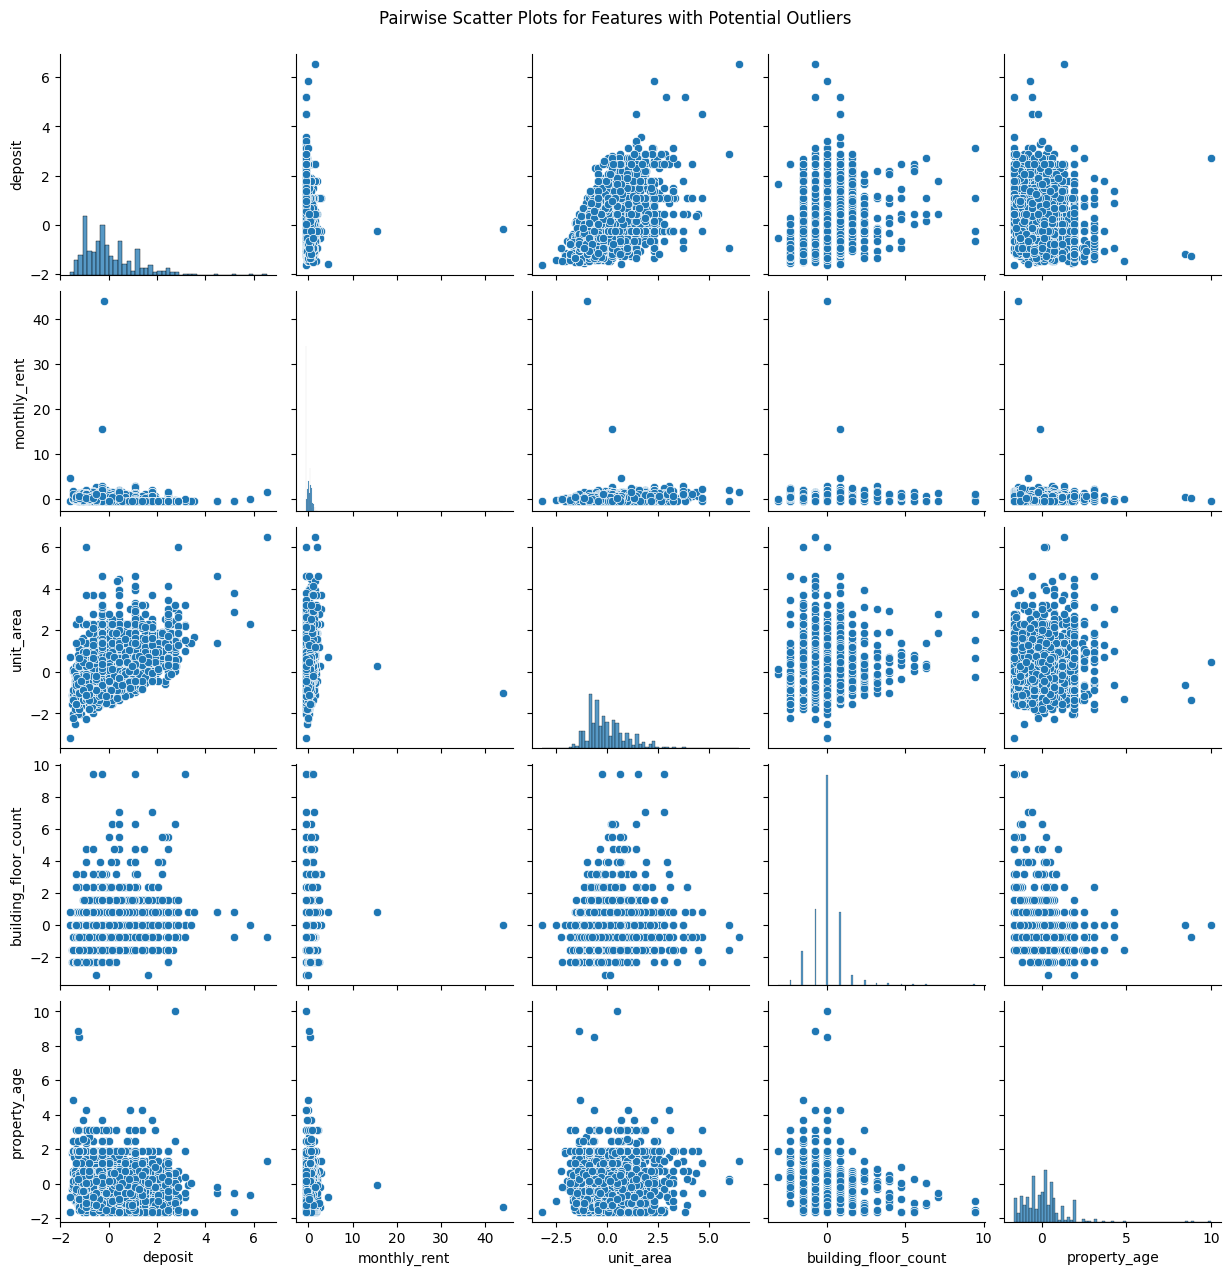

In [27]:
# Create scatter plots for pairwise combinations of features with higher possibility of outliers
plt.figure(figsize=(12, 8))
sns.pairplot(df[['deposit', 'monthly_rent', 'unit_area', 'building_floor_count', 'property_age']])
plt.suptitle('Pairwise Scatter Plots for Features with Potential Outliers', y=1.02)
plt.show()
